In [71]:
import pandas as pd

In [72]:
import matplotlib.pyplot as plt

In [73]:
# Read CSV file
df = pd.read_csv('train - train.csv', encoding='latin-1')
df = df.dropna()

# Display data
print(df)

      battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0               842     0          2.2         0   1.0     0.0         7.0   
1              1021     1          0.5         1   0.0     1.0        53.0   
2               563     1          0.5         1   2.0     1.0        41.0   
3               615     1          2.5         0   0.0     0.0        10.0   
4              1821     1          1.2         0  13.0     1.0        44.0   
...             ...   ...          ...       ...   ...     ...         ...   
1995            794     1          0.5         1   0.0     1.0         2.0   
1996           1965     1          2.6         1   0.0     0.0        39.0   
1997           1911     0          0.9         1   1.0     1.0        36.0   
1998           1512     0          0.9         0   4.0     1.0        46.0   
1999            510     1          2.0         1   5.0     1.0        45.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     r

In [74]:
df.shape

(1991, 21)

In [75]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc               float64
four_g           float64
int_memory       float64
m_dep            float64
mobile_wt        float64
n_cores          float64
pc               float64
px_height        float64
px_width         float64
ram              float64
sc_h             float64
sc_w             float64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [76]:
train_y = df['price_range']

In [77]:
train_y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 1991, dtype: int64

In [78]:
train_x = df.drop(['price_range'], axis=1)

In [79]:
train_x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19,0,0,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,14.0,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,3.0,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,3.0,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,5.0,336.0,670.0,869.0,18.0,10.0,19,1,1,1


In [80]:
corr_mat = train_x.corrwith(train_y)

In [81]:
print(corr_mat)

battery_power    0.199277
blue             0.021330
clock_speed     -0.006675
dual_sim         0.019108
fc               0.024738
four_g           0.015537
int_memory       0.041812
m_dep           -0.001396
mobile_wt       -0.032168
n_cores          0.004662
pc               0.034716
px_height        0.147956
px_width         0.163319
ram              0.917448
sc_h             0.021643
sc_w             0.038371
talk_time        0.020511
three_g          0.024896
touch_screen    -0.030315
wifi             0.019546
dtype: float64


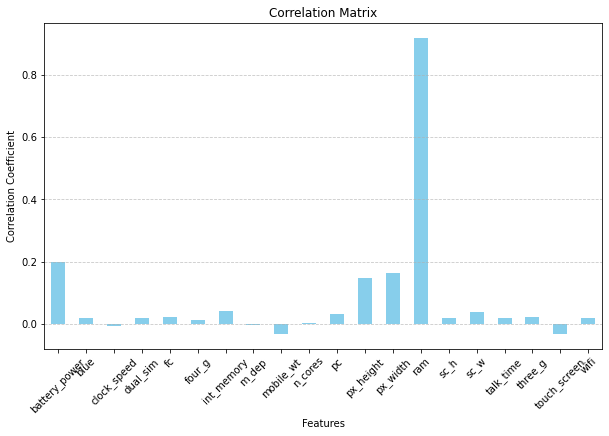

In [82]:
# Plot correlation
plt.figure(figsize=(10, 6))
corr_mat.plot(kind='bar', color='skyblue')
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### As we can see from the above fig, there are some features that are correlated with the price range and some other are not, So we are going to choose those correlated features and drop the other.

#### Let's drop the columns that has correlation coefficient less than abs (0.01)

In [83]:
# Filter columns with correlation coefficient less than 0.01
filtered_columns = corr_mat[abs(corr_mat) >= 0.01].index.tolist()

# Drop columns from DataFrame
train_x = train_x[filtered_columns]

In [113]:
column_indices = [df.columns.get_loc(col_name) for col_name in filtered_columns]

print("Indices of columns:", column_indices)

Indices of columns: [0, 1, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [84]:
filtered_columns

['battery_power',
 'blue',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'mobile_wt',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

In [85]:
train_x

,battery_power,blue,dual_sim,fc,four_g,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,0,1.0,0.0,7.0,188.0,2.0,20.0,756.0,2549.0,9.0,7.0,19,0,0,1
1,1021,1,1,0.0,1.0,53.0,136.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0
2,563,1,1,2.0,1.0,41.0,145.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0
3,615,1,0,0.0,0.0,10.0,131.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0
4,1821,1,0,13.0,1.0,44.0,141.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0.0,1.0,2.0,106.0,14.0,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0
1996,1965,1,1,0.0,0.0,39.0,187.0,3.0,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1
1997,1911,0,1,1.0,1.0,36.0,108.0,3.0,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0
1998,1512,0,0,4.0,1.0,46.0,145.0,5.0,336.0,670.0,869.0,18.0,10.0,19,1,1,1


### Apply some features transformation

#### 1-Standardization

In [86]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to your DataFrame
train_x_standardized = scaler.fit_transform(train_x)

# Convert the standardized array back to a DataFrame
train_x_standardized = pd.DataFrame(train_x_standardized, columns=train_x.columns)

# Print the standardized DataFrame
print(train_x_standardized)

      battery_power      blue  dual_sim        fc    four_g  int_memory  \
0         -0.901577 -0.992494 -1.021836 -0.762424 -1.042594   -1.382754   
1         -0.494324  1.007562  0.978631 -0.992910  0.959146    1.153971   
2         -1.536345  1.007562  0.978631 -0.531937  0.959146    0.492216   
3         -1.418037  1.007562 -1.021836 -0.992910 -1.042594   -1.217315   
4          1.325799  1.007562 -1.021836  2.003417  0.959146    0.657655   
...             ...       ...       ...       ...       ...         ...   
1986      -1.010784  1.007562  0.978631 -0.992910  0.959146   -1.658485   
1987       1.653421  1.007562  0.978631 -0.992910 -1.042594    0.381924   
1988       1.530563 -0.992494  0.978631 -0.762424  0.959146    0.216485   
1989       0.622776 -0.992494 -1.021836 -0.070964  0.959146    0.767947   
1990      -1.656928  1.007562  0.978631  0.159523  0.959146    0.712801   

      mobile_wt        pc  px_height  px_width       ram      sc_h      sc_w  \
0      1.348883 -1.

### Save the scaler model to re-use it

In [102]:
import pickle

# Assuming 'scaler' is your trained scaler object
# Replace 'scaler' with your actual trained scaler object

# Save the scaler model to a pickle file
with open('scaler.pickle', 'wb') as f:
    pickle.dump(scaler, f)

print("Scaler model saved as scaler.pickle")

Scaler model saved as scaler.pickle


### Let's Use SVM to predict 

In [87]:
X = train_x_standardized
y = train_y

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_classifier = SVC()

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8671679197994987


### Confusion matrix

In [99]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming 'y_true' is the true labels and 'y_pred' is the predicted labels
# Replace these with your actual true and predicted labels

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[95 11  0  0]
 [ 8 75  6  0]
 [ 0  7 89 11]
 [ 0  0 10 87]]


### Save the model

In [100]:
import pickle

# Assuming 'model' is your trained model object
# Replace 'model' with your actual trained model object

# Save the model to a pickle file
with open('model.pickle', 'wb') as f:
    pickle.dump(svm_classifier, f)

print("Model saved as model.pickle")

Model saved as model.pickle


In [101]:
filtered_columns

['battery_power',
 'blue',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'mobile_wt',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

### Define a function for processing

In [110]:
def pre_processing(df):
    # Drop columns from DataFrame
    df = df[filtered_columns]
    import pickle

    # Load the scaler model from the pickle file
    with open('scaler.pickle', 'rb') as f:
        scaler = pickle.load(f)

    # Apply standardization to your DataFrame
    df_standardized = scaler.fit_transform(df)

    # Convert the standardized array back to a DataFrame
    df_standardized = pd.DataFrame(df_standardized,columns= df.columns)

    return df_standardized
    

In [111]:
df_testing = pd.read_csv('test - test.csv', encoding='latin-1')

In [112]:
X_test = pre_processing(df_testing)

In [141]:
def pre_processing(test_point):
    # Drop columns from DataFrame
    filtered_columns = ['battery_power','blue','dual_sim','fc','four_g','int_memory','mobile_wt','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']
    indices_to_keep = [0, 1, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
    # Convert indices to a set for efficient membership testing


    new_arr = test_point[:,indices_to_keep]
    print(new_arr.shape)

    # Load the scaler model from the pickle file
    with open('scaler.pickle', 'rb') as f:
        scaler = pickle.load(f)

    # Apply standardization to your DataFrame
    test_standardized = scaler.fit_transform(new_arr)
    # Convert the standardized array back to a DataFrame
    test_standardized = pd.DataFrame(test_standardized,columns= filtered_columns)

    return test_standardized

In [142]:
features='1.0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20'
features = np.array([float(x) for x in features.split(',')])

In [143]:
print(features)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]


In [144]:
pre_processing(features.reshape(1, -1))

(1, 17)


,battery_power,blue,dual_sim,fc,four_g,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
